## Crude Oil Analysis Workbook

##### A workbook to examine the crude oil markets

## The first thing to examine is our pricing file.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pricing/Pricing Report 2025-02-24.xlsm
/kaggle/input/doefile/DOE.xlsm
/kaggle/input/production/Production.xlsm


In [2]:
production_file_path = '/kaggle/input/production/Production.xlsm'

eia_sheet_name = 'tblEiaRawProductionDpr'

platts_sheet_name = 'tblPlattsRawProduction'

ea_sheet_name = 'tblEaRawProduction'

rystad_sheet_name = 'tblRystadRawProduction'


eia_production_df = pd.read_excel(production_file_path, sheet_name=eia_sheet_name, usecols="B:J", skiprows=5, nrows=1700 ,header=0)

platts_production_df = pd.read_excel(production_file_path, sheet_name=platts_sheet_name, usecols="B:R", skiprows=6, nrows=220, header=0 )

ea_production_df = pd.read_excel(production_file_path, sheet_name=ea_sheet_name, usecols="B:Q", skiprows=5, nrows=200, header=0 )

rystad_production_df = pd.read_excel(production_file_path, sheet_name=rystad_sheet_name, usecols="B:N", skiprows=4, nrows=200000, header=0)


In [3]:
eia_production_df.head()

,Region,Month,Oil Rig Count (bpd),Oil Production Per Rig (bpd),Oil Legacy Production Change (bpd),Oil Total Production (bpd),Natural Gas Production Per Rig (Mcf/d),Natural Gas Legacy Production Change (Mcf/d),Natural Gas Total Production (Mcf/d)
0,Anadarko,2007-01-01,176.0,21.0,-600.0,126398.0,836.0,-109986.0,4031235.0
1,Anadarko,2007-02-01,180.0,22.0,-947.0,134177.0,843.0,-113261.0,4053325.0
2,Anadarko,2007-03-01,166.0,23.0,-1256.0,137516.0,848.0,-116190.0,4165396.0
3,Anadarko,2007-04-01,157.0,24.0,-1594.0,141463.0,852.0,-119395.0,4083829.0
4,Anadarko,2007-05-01,170.0,24.0,-1917.0,144206.0,856.0,-122475.0,4169285.0


In [4]:
pricing_file_path = '/kaggle/input/pricing/Pricing Report 2025-02-24.xlsm'

civ_historicals = 'CIV Historicals'

arg_daily_raw_sheet = 'ArgDailyPricingRaw'

arg_daily_volume_sheet = 'ArgDailyVolumeRaw'

civ_historical_df = pd.read_excel(pricing_file_path, sheet_name = civ_historicals, usecols = "B:BG", skiprows=3, nrows = 2000, header=0)

arg_daily_pricing_df = pd.read_excel(pricing_file_path, sheet_name=arg_daily_raw_sheet, usecols="A:Z", skiprows=1, nrows=2000 ,header=0)

arg_daily_volume_df = pd.read_excel(pricing_file_path, sheet_name = arg_daily_volume_sheet, usecols = "B:R", skiprows=4, nrows=7000, header=0)


## Argus Daily Pricing and Volume Work

In [29]:
arg_daily_pricing_df.head()

,combined_x000D_\ndescription,"Bakken Beaumont/Nederland weighted average month 1, Houston close, diff index, USD/bl, fip","Bakken Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","Bakken DAPL weighted average month 1, Houston close, diff index, USD/bl, fip","Bakken Patoka weighted average month 1, Houston close, diff index, USD/bl, fip","Canadian High TAN Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","Canadian High TAN Houston weighted average month 1, Houston close, diff index, USD/bl, fip","Canadian Syncrude daily weighted average month 1, Houston close, diff index, USD/bl, fip","DJ Light Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","Light Sweet Guernsey weighted average month 1, Houston close, diff index, USD/bl, fip",...,"WCS Houston weighted average month 1, Houston close, diff index, USD/bl, fip","White Cliffs Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Diff to CMA Nymex weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Formula Basis month 1, No time stamp, midpoint, USD/bl, fip","WTI Houston weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Midland Enterprise weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Midland weighted average month 1, Houston close, diff index, USD/bl, fip","WTL Midland weighted average month 1, Houston close, diff index, USD/bl, fip","WTS weighted average month 1, Houston close, diff index, USD/bl, fip",Date
0,2025-02-24,1.73,0.54,-3.20,2.03,-4.25,-3.60,-1.75,-0.50,-2.65,...,-3.10,-0.53,0.24,70.91,1.66,1.41,1.41,1.16,0.97,2025-02-24
1,2025-02-21,1.73,0.75,-3.20,2.03,-4.10,-3.45,-1.65,-0.33,-2.65,...,-2.94,-0.38,0.23,70.58,1.66,1.47,1.47,1.16,0.98,2025-02-21
2,2025-02-20,1.90,0.45,-3.20,1.95,-3.50,-2.68,-1.75,-0.51,-2.65,...,-2.13,-0.53,0.21,72.57,1.71,1.54,1.54,1.19,1.03,2025-02-20
3,2025-02-19,1.85,0.38,-3.20,1.98,-3.23,-2.60,-1.85,-0.58,-2.88,...,-1.86,-0.58,0.22,72.25,1.66,1.45,1.45,1.08,1.02,2025-02-19
4,2025-02-18,1.73,0.28,-3.18,1.85,-3.58,-2.88,-2.00,-0.71,-2.76,...,-2.35,-0.80,0.12,71.85,1.53,1.33,1.33,0.83,0.98,2025-02-18


In [30]:
pricing_df = arg_daily_pricing_df

In [31]:
pricing_df.columns

Index(['combined_x000D_\ndescription',
       'Bakken Beaumont/Nederland weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Bakken Cushing weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Bakken DAPL weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Bakken Patoka weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Canadian High TAN Cushing weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Canadian High TAN Houston weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Canadian Syncrude daily weighted average month 1, Houston close, diff index, USD/bl, fip',
       'DJ Light Cushing weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Light Sweet Guernsey weighted average month 1, Houston close, diff index, USD/bl, fip',
       'LLS weighted average month 1, Houston close, diff index, USD/bl, fip',
       'Mars weighted aver

In [32]:
pricing_df['Date'] = pricing_df['combined_x000D_\ndescription']

pricing_df = pricing_df.drop(columns = ['combined_x000D_\ndescription'])

In [33]:
p_df = pricing_df

In [34]:
p_df.head()

,"Bakken Beaumont/Nederland weighted average month 1, Houston close, diff index, USD/bl, fip","Bakken Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","Bakken DAPL weighted average month 1, Houston close, diff index, USD/bl, fip","Bakken Patoka weighted average month 1, Houston close, diff index, USD/bl, fip","Canadian High TAN Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","Canadian High TAN Houston weighted average month 1, Houston close, diff index, USD/bl, fip","Canadian Syncrude daily weighted average month 1, Houston close, diff index, USD/bl, fip","DJ Light Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","Light Sweet Guernsey weighted average month 1, Houston close, diff index, USD/bl, fip","LLS weighted average month 1, Houston close, diff index, USD/bl, fip",...,"WCS Houston weighted average month 1, Houston close, diff index, USD/bl, fip","White Cliffs Cushing weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Diff to CMA Nymex weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Formula Basis month 1, No time stamp, midpoint, USD/bl, fip","WTI Houston weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Midland Enterprise weighted average month 1, Houston close, diff index, USD/bl, fip","WTI Midland weighted average month 1, Houston close, diff index, USD/bl, fip","WTL Midland weighted average month 1, Houston close, diff index, USD/bl, fip","WTS weighted average month 1, Houston close, diff index, USD/bl, fip",Date
0,1.73,0.54,-3.20,2.03,-4.25,-3.60,-1.75,-0.50,-2.65,3.13,...,-3.10,-0.53,0.24,70.91,1.66,1.41,1.41,1.16,0.97,2025-02-24
1,1.73,0.75,-3.20,2.03,-4.10,-3.45,-1.65,-0.33,-2.65,3.25,...,-2.94,-0.38,0.23,70.58,1.66,1.47,1.47,1.16,0.98,2025-02-21
2,1.90,0.45,-3.20,1.95,-3.50,-2.68,-1.75,-0.51,-2.65,2.90,...,-2.13,-0.53,0.21,72.57,1.71,1.54,1.54,1.19,1.03,2025-02-20
3,1.85,0.38,-3.20,1.98,-3.23,-2.60,-1.85,-0.58,-2.88,3.05,...,-1.86,-0.58,0.22,72.25,1.66,1.45,1.45,1.08,1.02,2025-02-19
4,1.73,0.28,-3.18,1.85,-3.58,-2.88,-2.00,-0.71,-2.76,3.25,...,-2.35,-0.80,0.12,71.85,1.53,1.33,1.33,0.83,0.98,2025-02-18


In [35]:
p_df['Date']

0      2025-02-24
1      2025-02-21
2      2025-02-20
3      2025-02-19
4      2025-02-18
          ...    
1820   2018-01-08
1821   2018-01-05
1822   2018-01-04
1823   2018-01-03
1824   2018-01-02
Name: Date, Length: 1825, dtype: datetime64[ns]

In [36]:
import datetime

p_df['Date'] = pd.to_datetime(p_df['Date'])
p_df.sort_values(by='Date', inplace=True)

p_df.set_index("Date", inplace=True)

all_dates = pd.date_range(start = p_df.index.min(), end = p_df.index.max(), freq = "D")

p_df = p_df.reindex(all_dates)

p_df.fillna(method="ffill", inplace=True)

p_df.reset_index(inplace=True)
p_df.rename(columns={"index": "Date"}, inplace=True)

# ----------------------------------------------------------------
# Create a dummy column for weekday vs. weekend
# ----------------------------------------------------------------
# Pandas' dayofweek: Monday=0, Tuesday=1, ..., Sunday=6
p_df["DayOfWeek"] = p_df["Date"].dt.dayofweek

# "IsWeekend" dummy: 1 if Saturday (5) or Sunday (6), else 0
p_df["IsWeekend"] = (p_df["DayOfWeek"] >= 5).astype(int)



<ipython-input-36-2ae592f73177>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p_df.fillna(method="ffill", inplace=True)


In [43]:
%pip install pandas_market_calendars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.0/198.0 kB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas_market_calendars as mcal
import pandas as pd

# Get the CME calendar
cme = mcal.get_calendar('CMEGlobex_Crude')

# Define the date range for the calendar
start_date = '2018-01-01'
end_date = '2025-12-31'

# Get the schedule of trading sessions for CME
schedule = cme.schedule(start_date=start_date, end_date=end_date)

# Create a complete daily date range and remove the trading days to identify holidays
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
trading_days = pd.to_datetime(schedule.index)
holidays = all_dates.difference(trading_days)

# Filter out weekends (keep only dates with weekday 0-4)
special_holidays = holidays[holidays.weekday < 5]

print("CME special holidays from 2018 to 2026 (not weekends):")
print(special_holidays)


CME special holidays from 2018 to 2026 (not weekends):
DatetimeIndex(['2018-01-01', '2018-03-30', '2018-12-25', '2019-01-01',
               '2019-04-19', '2019-12-25', '2020-01-01', '2020-04-10',
               '2020-12-25', '2021-01-01', '2021-04-02', '2021-12-24',
               '2022-04-15', '2022-12-26', '2023-04-07', '2023-12-25',
               '2024-01-01', '2024-03-29', '2024-12-25', '2025-01-01',
               '2025-04-18', '2025-12-25'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
def explain_holidays(df):

    if 'Date' not in df.columns:
        raise ValueError("The DataFrame needs a Date column in order to be utilized by this function.")
    
    df['Date'] = pd.to_datetime(df['Date'])
    p_df.sort_values(by='Date', inplace=True)

    p_df.set_index("Date", inplace=True)

    all_dates = pd.date_range(start = p_df.index.min(), end = p_df.index.max(), freq = "D")

    p_df = p_df.reindex(all_dates)

    p_df.fillna(method="ffill", inplace=True)

    p_df.reset_index(inplace=True)
    p_df.rename(columns={"index": "Date"}, inplace=True)

    # ----------------------------------------------------------------
    # Create a dummy column for weekday vs. weekend
    # ----------------------------------------------------------------
    # Pandas' dayofweek: Monday=0, Tuesday=1, ..., Sunday=6
    p_df["DayOfWeek"] = p_df["Date"].dt.dayofweek

    # "IsWeekend" dummy: 1 if Saturday (5) or Sunday (6), else 0
    p_df["IsWeekend"] = (p_df["DayOfWeek"] >= 5).astype(int)
    

In [6]:
arg_daily_volume_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TradeMonth,Date,Grade,Del. Mode,Volume,Vol. units,Price,Deal Diff Base Year,Basis,Diff. Period,Price Units,Seller,Buyer,Del. Period,Year,Country,Deliver from
0,2025-03-01,2025-02-24,WCS Houston,pipeline,2000.0,bl/day,-3.10,NaN,CMA Nymex trade days Mar,NaN,USD/bl,Unknown,Unknown,Mar,2025.0,USA,Houston area
1,2025-03-01,2025-02-24,Cold Lake Houston,pipeline,3226.0,bl/day,-3.10,NaN,CMA Nymex trade days Mar,NaN,USD/bl,Unknown,Unknown,Mar,2025.0,USA,Houston area
2,2025-03-01,2025-02-24,Cold Lake Houston,pipeline,3226.0,bl/day,-3.10,NaN,CMA Nymex trade days Mar,NaN,USD/bl,Unknown,Unknown,Mar,2025.0,USA,Houston area
3,2025-03-01,2025-02-21,WCS Cushing,pipeline,2000.0,bl/day,-3.90,NaN,CMA Nymex trade days Mar,NaN,USD/bl,Unknown,Unknown,Mar,2025.0,USA,Cushing Oklahoma
4,2025-03-01,2025-02-21,Cold Lake Houston,pipeline,3226.0,bl/day,-2.85,NaN,CMA Nymex trade days Mar,NaN,USD/bl,Unknown,Unknown,Mar,2025.0,USA,Houston area


In [8]:
volume_df = arg_daily_volume_df.drop(columns = ['TradeMonth', 'Del. Mode', 'Vol. units', 'Deal Diff Base Year', 'Diff. Period', 'Price Units', 'Seller', 'Buyer', 'Del. Period', 'Year'])

In [9]:
volume_df.columns

Index(['Date', 'Grade', 'Volume', 'Price', 'Basis', 'Country', 'Deliver from'], dtype='object')

In [10]:
u_vals_Deliverfrom = volume_df['Deliver from'].nunique()
u_vals_Country = volume_df['Country'].nunique()
u_vals_Basis = volume_df['Basis'].nunique()

print(f"There are {u_vals_Deliverfrom} unique values in the Deliver from column")
print(f"There are {u_vals_Country} unique values in the Country column")
print(f"There are {u_vals_Basis} unique values in the Basis column")

There are 2 unique values in the Deliver from column
There are 1 unique values in the Country column
There are 13 unique values in the Basis column


In [11]:
print(volume_df['Basis'].unique())

[' CMA Nymex trade days Mar' ' CMA Nymex trade days Feb'
 ' CMA Nymex trade days Jan' ' CMA Nymex trade days Dec'
 ' CMA Nymex trade days Nov' ' CMA Nymex trade days Oct'
 ' CMA Nymex trade days Sep' ' CMA Nymex trade days Aug'
 ' CMA Nymex trade days Jul' ' CMA Nymex trade days Jun'
 ' CMA Nymex trade days May' ' CMA Nymex trade days'
 ' CMA Nymex trade days Apr']


In [13]:
# 1. Define your month map
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3,  "Apr": 4,  "May": 5,  "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9,  "Oct": 10, "Nov": 11, "Dec": 12
}

# 2. Create a function to parse the last word and map to a number
def encode_month_abbr(basis_string):
    # Split and get the last token
    tokens = basis_string.split()
    if not tokens:
        return 50  # empty string edge case
    
    last_word = tokens[-1]
    
    # 3. Check if last_word is in the month map
    return month_map.get(last_word, 50)  # default to 50 if not found

# Apply to the DataFrame
volume_df["basis_encoded"] = volume_df["Basis"].apply(encode_month_abbr)

print(volume_df)


           Date              Grade  Volume  Price                      Basis  \
0    2025-02-24        WCS Houston  2000.0  -3.10   CMA Nymex trade days Mar   
1    2025-02-24  Cold Lake Houston  3226.0  -3.10   CMA Nymex trade days Mar   
2    2025-02-24  Cold Lake Houston  3226.0  -3.10   CMA Nymex trade days Mar   
3    2025-02-21        WCS Cushing  2000.0  -3.90   CMA Nymex trade days Mar   
4    2025-02-21  Cold Lake Houston  3226.0  -2.85   CMA Nymex trade days Mar   
...         ...                ...     ...    ...                        ...   
5084 2021-12-29  Cold Lake Cushing  3571.0  -6.05   CMA Nymex trade days Feb   
5085 2021-12-28  Cold Lake Cushing  3571.0  -6.00   CMA Nymex trade days Feb   
5086 2021-12-28  Cold Lake Cushing  3571.0  -5.90   CMA Nymex trade days Feb   
5087 2021-12-28  Cold Lake Cushing  3571.0  -5.85   CMA Nymex trade days Feb   
5088 2021-12-28  Cold Lake Houston  3571.0  -4.85   CMA Nymex trade days Feb   

     Country      Deliver from  month_e

In [16]:
volume_df = volume_df.drop(columns = ['Country'])

In [8]:
civ_df_cleaned1 = civ_historical_df.drop(columns = ['Naphtha Price $', 'PetCoke Price $', 'Diesel Price $', 'LSFO Price $'])

In [9]:
civ_df_cleaned1.set_index('CalendarDate', inplace=True)


In [10]:
print(civ_df_cleaned1.index.names)


['CalendarDate']


In [11]:
# Identify numeric columns (excluding any that might already be percentage values)
num_cols = civ_df_cleaned1.select_dtypes(include=['number']).columns
cols_to_calc = [col for col in num_cols if "%" not in col and "percent" not in col.lower()]

# Calculate the percentage change based on the absolute value of the previous row for each selected column
for col in cols_to_calc:
    new_col = col + '_pct_change_abs'
    # Calculate percentage change using absolute value for denominator:
    civ_df_cleaned1[new_col] = (civ_df_cleaned1[col] - civ_df_cleaned1[col].shift(1)) / \
                               civ_df_cleaned1[col].shift(1).abs() * 100

# (Optional) If there are cases where the previous value is zero,
# you might want to handle them to avoid infinite values.
# For example, replacing infinite values with NaN:
civ_df_cleaned1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, drop rows with NaN values if needed (usually the first row or those with problematic denominators)
civ_df_cleaned1.dropna(subset=[col + '_pct_change_abs' for col in cols_to_calc], inplace=True)

In [12]:
# --- Step 1: Sort by date to ensure correct order ---
civ_df_cleaned1.sort_values(by="CalendarDate", inplace=True)


# --- Step 3: Identify columns to forward-fill ---
columns_to_ffill = [
    "Propane Price $",
    "Gasoline Price $",
    "Gasoil Price $",
    "Jet/Kero Price $",
    "HSFO Price $",
    "NatGas Price $",
    "NYMEX WTI",
    "MARS (WTI Basis)",
    "MARS Outright (WTI Basis)",
    "Total Product MARS $",
    "MARS Crack $",
    "Arg WTI Diff to CMA",
    "WCS Houston (WTI CMA)",
    "WCS Houston (WTI Basis)",
    "WCS Outright (WTI Basis)",
    "Total Product WCS $",
    "WCS Crack $",
    "WCS-MARS Crack USGC $",
    "Distillate-Gasoline Spread USGC $",
    "WCS-MARS Basis Spread USGC $",
    "HSFO-LSFO Spread USGC $",
    "HSFO-WCS Houston Spread USGC $",
    "Basis Explain (WCS Crack)",
    "Product Yield Explain (WCS Crack)",
    "Basis Explain (MARS Crack)",
    "Product Explain (MARS Crack)",
    "Basis Explain (WCS-MARS)",
    "Products Yield Explain (WCS-MARS)"
    # Add or remove columns as needed
]

# --- Step 4: Forward-fill the missing values ---
# This copies Friday's values into Saturday and Sunday rows (and holidays).
# If you only want to fill up to 2 days, you can add `limit=2`.
civ_df_cleaned1[columns_to_ffill] = civ_df_cleaned1[columns_to_ffill].fillna(method='ffill')

# Now the weekend/holiday rows will have the last known value from the prior trading day.


<ipython-input-12-7e5296644b20>:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  civ_df_cleaned1[columns_to_ffill] = civ_df_cleaned1[columns_to_ffill].fillna(method='ffill')


In [13]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# --------------------------------------------------------------------
# 1. Make a copy of your original DataFrame
# --------------------------------------------------------------------
df = civ_df_cleaned1.copy()

# --------------------------------------------------------------------
# 2. Drop all object (string) columns (if you wanted to keep "CalendarDate",
#    you could filter it out, but here we drop them all as in your script)
# --------------------------------------------------------------------
obj_cols = df.select_dtypes(include=['object']).columns
cols_to_drop = [col for col in obj_cols]
df.drop(columns=cols_to_drop, inplace=True)

# --------------------------------------------------------------------
# 4. Identify your target column
# --------------------------------------------------------------------
target_col = "WCS Houston (WTI Basis)"

# --------------------------------------------------------------------
# 5. Create lagged features for ALL columns (all columns are lagged)
#    (including the target, because we want target_lag1 as a feature)
# --------------------------------------------------------------------
cols_for_lagging = list(df.columns)
for col in cols_for_lagging:
    df[col + "_lag1"] = df[col].shift(1)

# --------------------------------------------------------------------
# 6. Keep only:
#    - The CURRENT target (to be predicted) 
#    - All lagged features as predictors
# --------------------------------------------------------------------
columns_to_keep = [target_col] + [c for c in df.columns if c.endswith("_lag1")]
df = df[columns_to_keep]

# --------------------------------------------------------------------
# 7. Drop any rows that have NaN values introduced by lagging
# --------------------------------------------------------------------
df.dropna(inplace=True)

# --------------------------------------------------------------------
# 8. Split into features (X) and target (y)
# --------------------------------------------------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# --------------------------------------------------------------------
# 9. Use TimeSeriesSplit for train/test splits
# --------------------------------------------------------------------
tscv = TimeSeriesSplit(n_splits=3)
mse_scores = []
fold = 0

for train_index, test_index in tscv.split(X):
    fold += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # --------------------------------------------------------------------
    # 10. Fit a Gradient Boosting model on the current fold
    # --------------------------------------------------------------------
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # --------------------------------------------------------------------
    # 11. Evaluate the model on the test fold
    # --------------------------------------------------------------------
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Fold {fold} MSE: {mse}")

# Print average MSE over all folds
print("Average MSE across folds:", sum(mse_scores)/len(mse_scores))

# --------------------------------------------------------------------
# 12. Check feature importances (from the last fold model)
# --------------------------------------------------------------------
importances = model.feature_importances_
feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nFeature Importances from the last fold:")
print(feat_importances)


Fold 1 MSE: 0.38078270225534777
Fold 2 MSE: 0.6774046854970355
Fold 3 MSE: 0.8467610083054121
Average MSE across folds: 0.6349827986859319

Feature Importances from the last fold:
                                   feature  importance
24            WCS Houston (WTI Basis)_lag1    0.380387
44          Basis Explain (WCS Crack)_lag1    0.187610
49  Products Yield Explain (WCS-MARS)_lag1    0.153018
23              WCS Houston (WTI CMA)_lag1    0.114430
38                        WCS Crack $_lag1    0.021583
..                                     ...         ...
31               Jet/Kero Yield WCS %_lag1    0.000000
32                   HSFO Yield WCS %_lag1    0.000000
36                Total Product WCS %_lag1    0.000000
35                 NatGas Yield WCS %_lag1    0.000000
16                  LSFO Yield MARS %_lag1    0.000000

[78 rows x 2 columns]


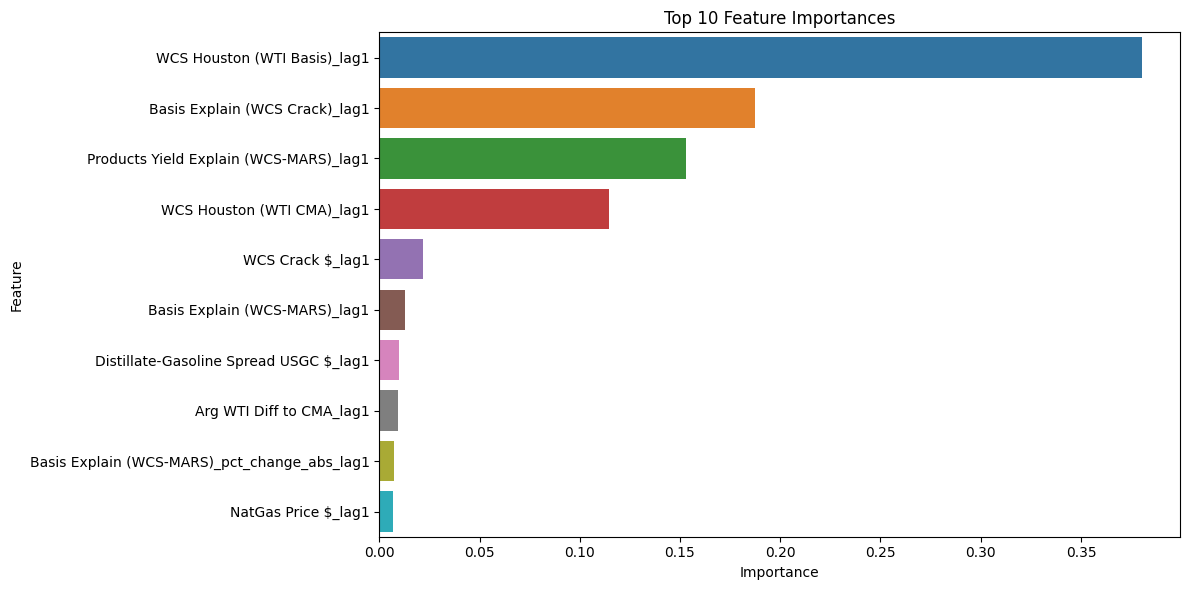

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 features based on importance
top10 = feat_importances.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="importance", y="feature", data=top10)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [15]:
#Let us create some moving averages

# Suppose these are your top five feature columns (ensure these exist in your DataFrame)
top_features = [
    'WCS Houston (WTI Basis)_lag1',
    'Basis Explain (WCS Crack)_lag1',
    'Products Yield Explain (WCS-MARS)_lag1',
    'WCS Crack $_lag1',
    'WCS Houston (WTI CMA)_lag1'
]

# Create moving averages. Adjust the window sizes as needed.
# Here we assume the DataFrame is indexed by date and sorted in ascending order.
for feature in top_features:
    # Weekly moving average (7-day window)
    df[feature + '_weekly_ma'] = df[feature].rolling(window=7).mean()
    # Monthly moving average (30-day window)
    df[feature + '_monthly_ma'] = df[feature].rolling(window=30).mean()

# Drop any resulting NaNs (at the beginning of the series)
df.dropna(inplace=True)

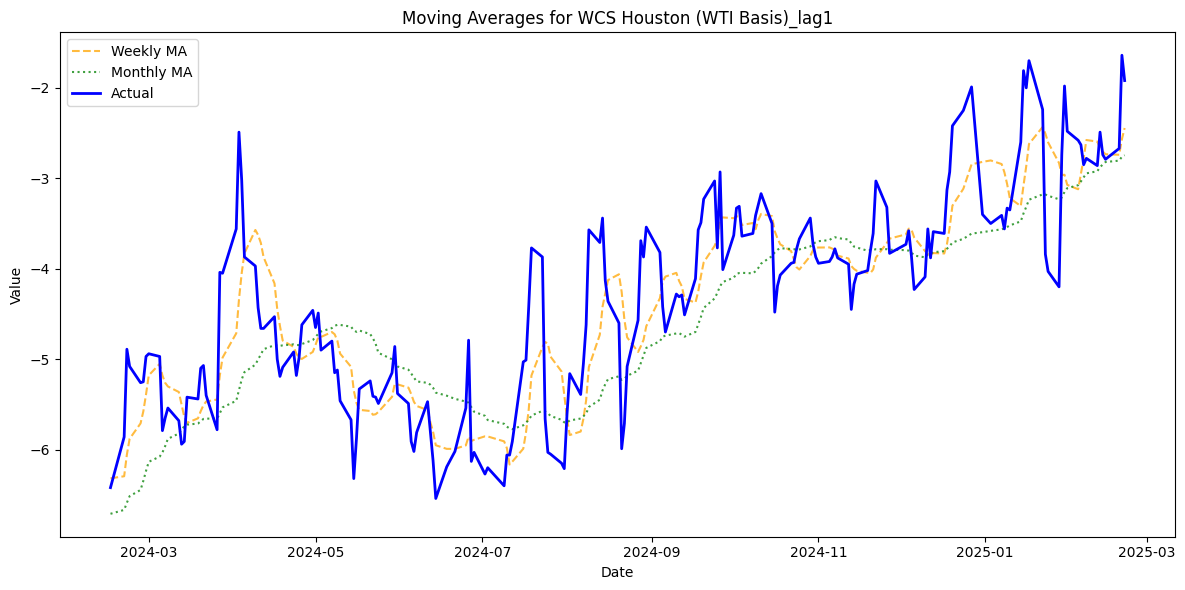

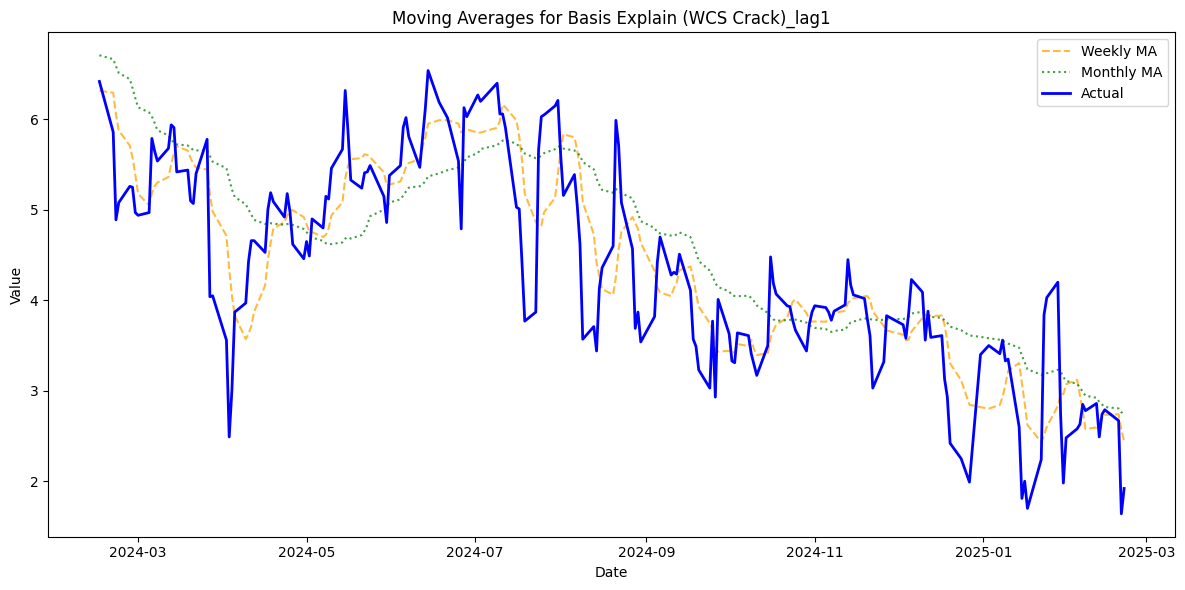

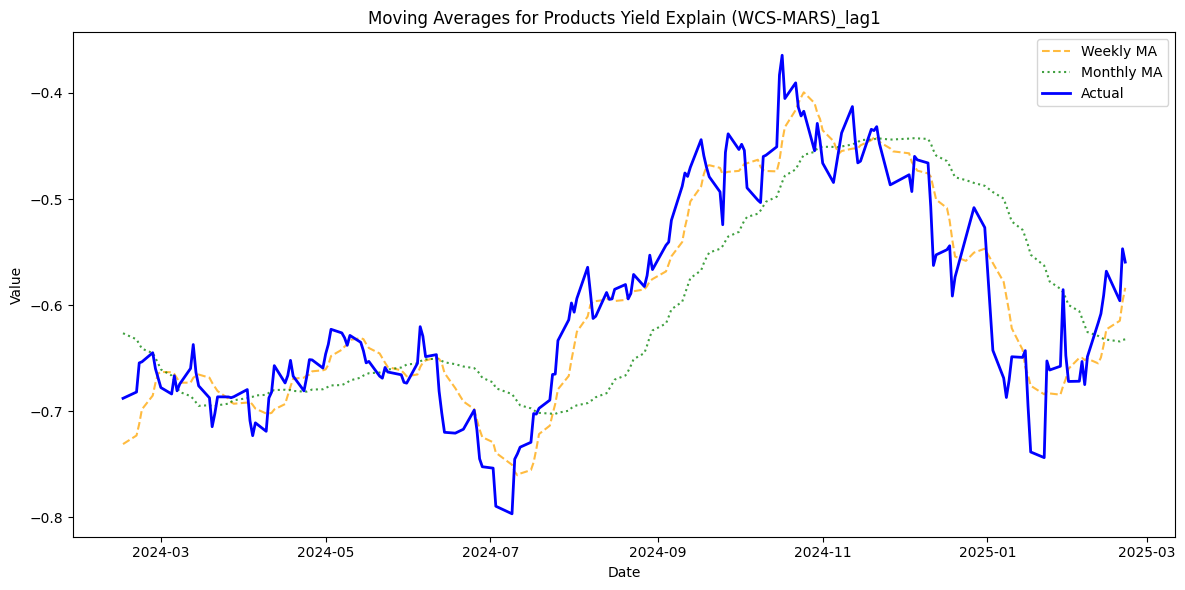

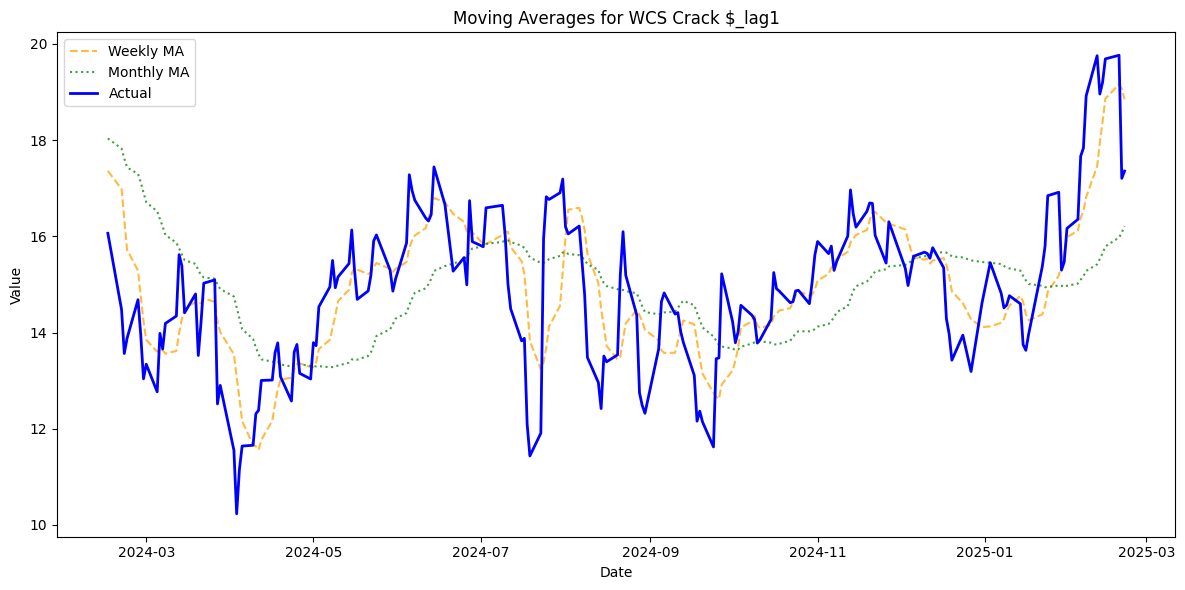

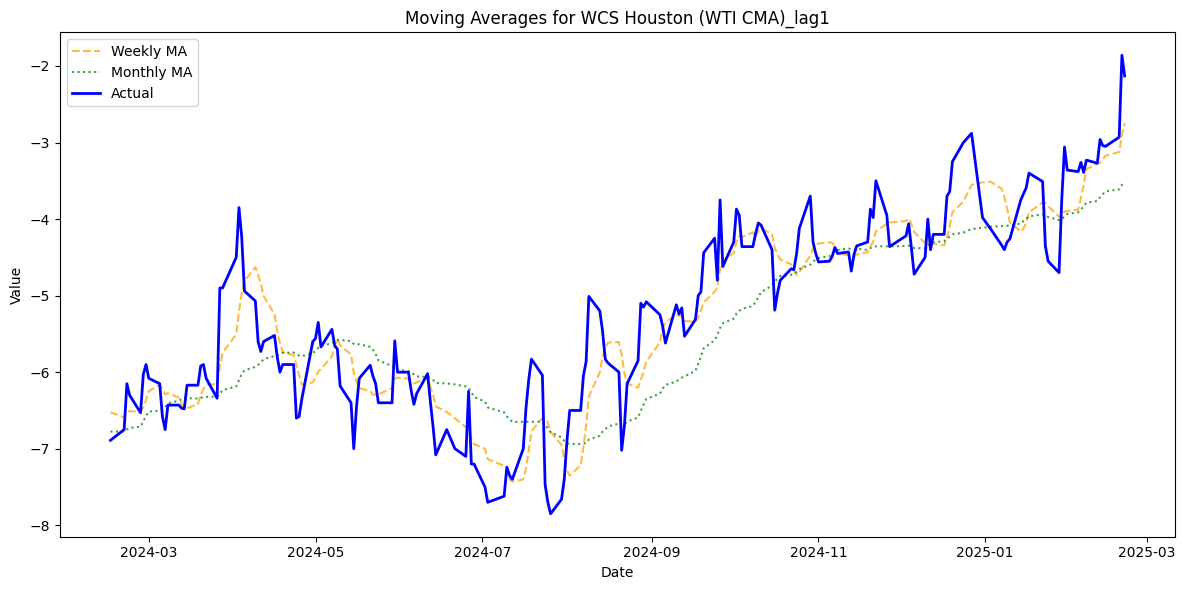

In [16]:
for feature in top_features:
    plt.figure(figsize=(12, 6))
    # Plot moving averages first (background)
    plt.plot(df.index, df[feature + '_weekly_ma'], label='Weekly MA', 
             color='orange', linestyle='--', alpha=0.75, zorder=1)
    plt.plot(df.index, df[feature + '_monthly_ma'], label='Monthly MA', 
             color='green', linestyle=':', alpha=0.75, zorder=1)
    
    # Overlay the actual feature on top
    plt.plot(df.index, df[feature], label='Actual', 
             color='blue', linewidth=2, zorder=2)
    
    plt.title(f'Moving Averages for {feature}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()


The best motif is from 2024-06-27 to 2024-07-24
Its nearest neighbor is from 2024-12-04 to 2024-12-31
The current 2-week segment is from 2025-01-29 to 2025-02-21


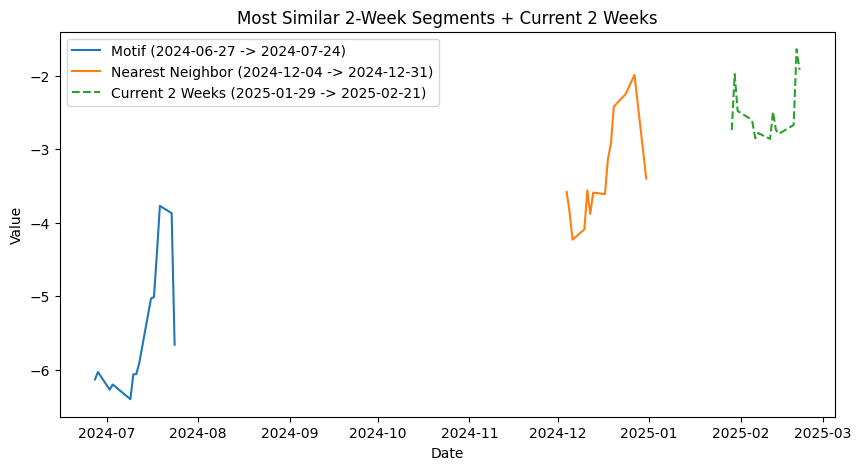

In [17]:
import stumpy
import numpy as np

m = 14  # window size of 2 weeks (if data is daily)
feature = top_features[0]
data = df[top_features[0]].values  # e.g., a 1D NumPy array of your chosen feature

mp = stumpy.stump(data, m=m)  # mp.shape = (len(data)-m+1, 4)
# Column 0 of mp is the matrix profile value
motif_idx = np.argmin(mp[:, 0])  # index i of the best motif
nn_idx = int(mp[motif_idx, 1])  # index j of the best match
motif_subseq = data[motif_idx : motif_idx + m]
nn_subseq = data[nn_idx : nn_idx + m]

start_date_motif = df.index[motif_idx]
end_date_motif   = df.index[motif_idx + m - 1]

start_date_nn    = df.index[nn_idx]
end_date_nn      = df.index[nn_idx + m - 1]

print(f"The best motif is from {start_date_motif.date()} to {end_date_motif.date()}")
print(f"Its nearest neighbor is from {start_date_nn.date()} to {end_date_nn.date()}")


current_idx = len(df) - m
current_subseq = data[current_idx : current_idx + m]

start_date_current = df.index[current_idx]
end_date_current   = df.index[current_idx + m - 1]
print(f"The current 2-week segment is from {start_date_current.date()} to {end_date_current.date()}")



# --- 4) Slice the DataFrame for plotting each segment with real dates ---
motif_slice   = df.iloc[motif_idx : motif_idx + m]
nn_slice      = df.iloc[nn_idx : nn_idx + m]
current_slice = df.iloc[current_idx : current_idx + m]

# --- 5) Plot all three segments ---
plt.figure(figsize=(10, 5))

# Motif slice
plt.plot(motif_slice.index, motif_slice[feature], 
         label=f"Motif ({start_date_motif.date()} -> {end_date_motif.date()})")

# Nearest neighbor slice
plt.plot(nn_slice.index, nn_slice[feature], 
         label=f"Nearest Neighbor ({start_date_nn.date()} -> {end_date_nn.date()})")

# Current 2-week slice
plt.plot(current_slice.index, current_slice[feature], 
         label=f"Current 2 Weeks ({start_date_current.date()} -> {end_date_current.date()})",
         linestyle='--')

plt.title("Most Similar 2-Week Segments + Current 2 Weeks")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [20]:
top_features[3]

'WCS Crack $_lag1'

The best motif is from 2024-05-21 to 2024-06-13
Its nearest neighbor is from 2024-10-02 to 2024-10-24
The current 2-week segment is from 2025-01-29 to 2025-02-21


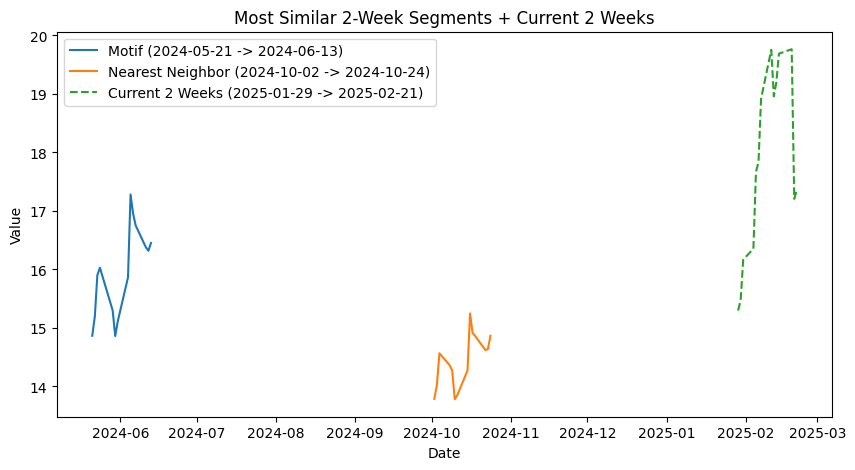

In [21]:
import stumpy
import numpy as np

m = 14  # window size of 2 weeks (if data is daily)
feature = top_features[3]
data = df[top_features[3]].values  # e.g., a 1D NumPy array of your chosen feature

mp = stumpy.stump(data, m=m)  # mp.shape = (len(data)-m+1, 4)
# Column 0 of mp is the matrix profile value
motif_idx = np.argmin(mp[:, 0])  # index i of the best motif
nn_idx = int(mp[motif_idx, 1])  # index j of the best match
motif_subseq = data[motif_idx : motif_idx + m]
nn_subseq = data[nn_idx : nn_idx + m]

start_date_motif = df.index[motif_idx]
end_date_motif   = df.index[motif_idx + m - 1]

start_date_nn    = df.index[nn_idx]
end_date_nn      = df.index[nn_idx + m - 1]

print(f"The best motif is from {start_date_motif.date()} to {end_date_motif.date()}")
print(f"Its nearest neighbor is from {start_date_nn.date()} to {end_date_nn.date()}")


current_idx = len(df) - m
current_subseq = data[current_idx : current_idx + m]

start_date_current = df.index[current_idx]
end_date_current   = df.index[current_idx + m - 1]
print(f"The current 2-week segment is from {start_date_current.date()} to {end_date_current.date()}")



# --- 4) Slice the DataFrame for plotting each segment with real dates ---
motif_slice   = df.iloc[motif_idx : motif_idx + m]
nn_slice      = df.iloc[nn_idx : nn_idx + m]
current_slice = df.iloc[current_idx : current_idx + m]

# --- 5) Plot all three segments ---
plt.figure(figsize=(10, 5))

# Motif slice
plt.plot(motif_slice.index, motif_slice[feature], 
         label=f"Motif ({start_date_motif.date()} -> {end_date_motif.date()})")

# Nearest neighbor slice
plt.plot(nn_slice.index, nn_slice[feature], 
         label=f"Nearest Neighbor ({start_date_nn.date()} -> {end_date_nn.date()})")

# Current 2-week slice
plt.plot(current_slice.index, current_slice[feature], 
         label=f"Current 2 Weeks ({start_date_current.date()} -> {end_date_current.date()})",
         linestyle='--')

plt.title("Most Similar 2-Week Segments + Current 2 Weeks")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


The best motif is from 2024-07-03 to 2024-07-30
Its nearest neighbor is from 2024-12-10 to 2025-01-08
The current 2-week segment is from 2025-01-29 to 2025-02-21


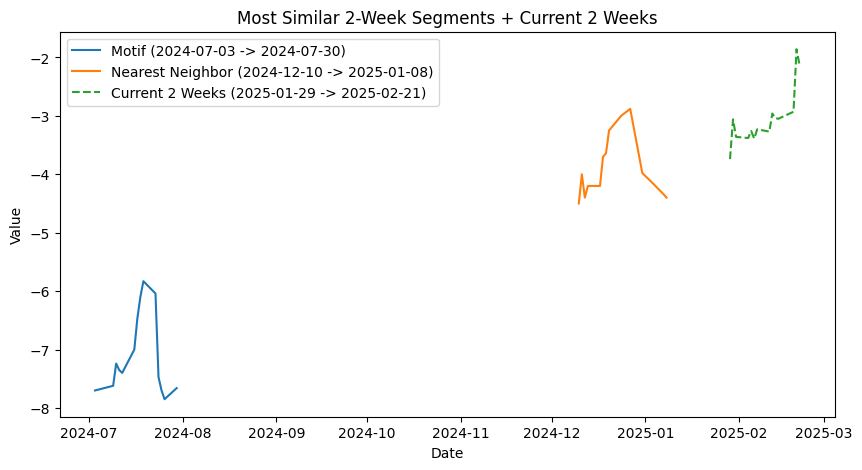

In [77]:
import stumpy
import numpy as np

m = 14  # window size of 2 weeks (if data is daily)
feature = top_features[4]
data = df[top_features[4]].values  # e.g., a 1D NumPy array of your chosen feature

mp = stumpy.stump(data, m=m)  # mp.shape = (len(data)-m+1, 4)
# Column 0 of mp is the matrix profile value
motif_idx = np.argmin(mp[:, 0])  # index i of the best motif
nn_idx = int(mp[motif_idx, 1])  # index j of the best match
motif_subseq = data[motif_idx : motif_idx + m]
nn_subseq = data[nn_idx : nn_idx + m]

start_date_motif = df.index[motif_idx]
end_date_motif   = df.index[motif_idx + m - 1]

start_date_nn    = df.index[nn_idx]
end_date_nn      = df.index[nn_idx + m - 1]

print(f"The best motif is from {start_date_motif.date()} to {end_date_motif.date()}")
print(f"Its nearest neighbor is from {start_date_nn.date()} to {end_date_nn.date()}")


current_idx = len(df) - m
current_subseq = data[current_idx : current_idx + m]

start_date_current = df.index[current_idx]
end_date_current   = df.index[current_idx + m - 1]
print(f"The current 2-week segment is from {start_date_current.date()} to {end_date_current.date()}")



# --- 4) Slice the DataFrame for plotting each segment with real dates ---
motif_slice   = df.iloc[motif_idx : motif_idx + m]
nn_slice      = df.iloc[nn_idx : nn_idx + m]
current_slice = df.iloc[current_idx : current_idx + m]

# --- 5) Plot all three segments ---
plt.figure(figsize=(10, 5))

# Motif slice
plt.plot(motif_slice.index, motif_slice[feature], 
         label=f"Motif ({start_date_motif.date()} -> {end_date_motif.date()})")

# Nearest neighbor slice
plt.plot(nn_slice.index, nn_slice[feature], 
         label=f"Nearest Neighbor ({start_date_nn.date()} -> {end_date_nn.date()})")

# Current 2-week slice
plt.plot(current_slice.index, current_slice[feature], 
         label=f"Current 2 Weeks ({start_date_current.date()} -> {end_date_current.date()})",
         linestyle='--')

plt.title("Most Similar 2-Week Segments + Current 2 Weeks")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

## **S&D Work**

##### I have done some good work strictly with prices. Work that is replicatable and expandable.

##### What are my top three actionable insights:

##### 1) The most important features for predicting WCS Houston (WTI Basis) price are, the lagged price, the lagged Basis Explain (WCS Crack), and the lagged Products Yield Explain (WCS-MARS).

##### 2) WCS Houston (WTI Basis) is so directly related to Basis Explain (WCS Crack) that its motif and nearest neighbor using stumpy (z-normalized euclidean distance) has the exact same date as the motif for WCS Houston (WTI Basis). In other words... they move in TANDEM!!

##### 3) Is this an opportunity for pairs trading, examining deviations and capitalizing??

##### Now let's expand and try and do some exploratory data analysis on the S&D numbers, for example production, demand, and imports/exports.